

### Data Analytics II


1. Implement logistic regression using Python/R	to perform	classification on Social_Network_Ads.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision,
Recall on the given dataset.

# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
sns.set()
np.random.seed(0)

# Loading the dataset

In [3]:
df=pd.read_csv('Social_Network_Ads.csv')

In [4]:
df.shape

(400, 5)

In [5]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
gender = df['Gender']

In [7]:
le = LabelEncoder()
le.fit(['Male', 'Female'])

LabelEncoder()

In [8]:
gender = le.transform(gender)

In [9]:
df['Gender'] = gender

In [10]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


# Splitting into Train and Test data

In [11]:
X, Y = df.drop('Purchased', axis='columns'), df['Purchased']

In [12]:
X

,User ID,Gender,Age,EstimatedSalary
0,15624510,1,19,19000
1,15810944,1,35,20000
2,15668575,0,26,43000
3,15603246,0,27,57000
4,15804002,1,19,76000
...,...,...,...,...
395,15691863,0,46,41000
396,15706071,1,51,23000
397,15654296,0,50,20000
398,15755018,1,36,33000


In [13]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [14]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, random_state=0)

In [15]:
X_train.shape, X_val.shape, Y_train.shape, Y_val.shape

((300, 4), (100, 4), (300,), (100,))

# Training the Logistic Regression Model

In [16]:
model = LogisticRegression(random_state=0)

In [17]:
model.fit(X_train, Y_train)

LogisticRegression(random_state=0)

# Evaluation

In [18]:
Y_pred = model.predict(X_val)

In [19]:
error = mean_squared_error(Y_val, Y_pred)

In [20]:
print("Validation error (MSE) : ", error)

Validation error (MSE) :  0.19


# Confusion Matrix

In [21]:
cm = confusion_matrix(Y_val, Y_pred)

In [22]:
cm

array([[66,  2],
       [17, 15]])

In [23]:
np.sum(cm, axis=1)

array([68, 32])

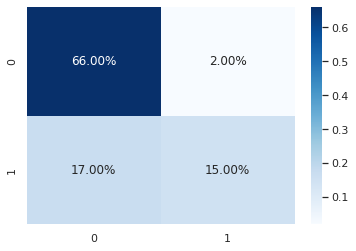

In [24]:
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
plt.show()

In [25]:
def evaluate_metrics_for_class(cm):
    row_sums, col_sums = np.sum(cm, axis=1), np.sum(cm, axis=0)
    TP, FP, FN = cm[0][0], row_sums[0] - cm[0][0], col_sums[0] - cm[0][0]
    TN = np.sum(cm) - TP - FP - FN
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    return TP, FP, FN, TN, precision, recall

In [26]:
TP, FP, FN, TN, precision, recall = evaluate_metrics_for_class(cm)

In [27]:
print("TP : ", TP)
print("FP : ", FP)
print("FN : ", FN)
print("TN : ", TN)
print("Precision : ", precision)
print("Recall : ", recall)

TP :  66
FP :  2
FN :  17
TN :  15
Precision :  0.9705882352941176
Recall :  0.7951807228915663
